In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
df = pd.read_hdf('Danionella.h5')

In [4]:
df.head(10)

x         y     theta  tail_angle_01  tail_angle_02  \
frame_id                                                               
305901    354.6027  762.4877  1.688693      -0.057569      -0.098585   
305902    354.7846  762.4101  1.679170      -0.049721      -0.110686   
305903    354.7972  762.2639  1.680839      -0.063216      -0.105089   
305904    354.9238  762.0828  1.677423      -0.060133      -0.113719   
305905    354.8554  762.4290  1.676634      -0.036935      -0.148548   
305906    354.9251  762.2833  1.676751      -0.025943      -0.151010   
305907    354.9701  762.2706  1.679253      -0.029676      -0.154981   
305908    355.0045  762.0753  1.681015      -0.049407      -0.124992   
305909    354.9362  762.7366  1.679855      -0.003576      -0.172042   
305910    354.9089  762.6892  1.683179      -0.021265      -0.109144   

          tail_angle_03  tail_angle_04  tail_angle_05  tail_angle_06  \
frame_id                                                               
305901         0.079641       0.049129      -0.082754      -0.128328   
305902         0.082935       0.060231      -0.066932      -0.100862   
305903         0.083205       0.053699      -0.052808      -0.083353   
305904         0.073875       0.065227      -0.009110      -0.101244   
305905         0.095650       0.001300       0.095087      -0.151557   
305906         0.034835       0.084802       0.017422      -0.076704   
305907         0.040370       0.071754       0.004252      -0.026808   
305908         0.026483       0.080777      -0.039683       0.034957   
305909        -0.014626       0.082224       0.014183       0.051321   
305910        -0.092486       0.054679       0.077161       0.003881   

          tail_angle_07  ...  tail_value_01  tail_value_02  tail_value_03  \
frame_id                 ...                                                
305901        -0.083319  ...       110.2709       107.3225       60.82891   
305902        -0.116938  ...       108.7593       118.9064       71.30074   
305903        -0.116282  ...       112.0417       119.4430       82.47068   
305904        -0.110419  ...       113.9246       124.5385       92.53473   
305905        -0.096062  ...       112.6283       113.8588       97.03622   
305906        -0.084571  ...       116.6183       113.7184       91.00258   
305907        -0.088701  ...       119.7308       112.0695       88.51680   
305908        -0.095538  ...       117.7122       113.0838       84.81815   
305909        -0.101861  ...       127.7499       123.9602       86.90324   
305910        -0.014184  ...       130.2539       107.3957       91.64360   

          tail_value_04  tail_value_05  tail_value_06  tail_value_07  \
frame_id                                                               
305901         90.88052       76.23203       51.16987       44.68130   
305902         84.24125       77.45908       48.44184       46.75766   
305903         82.50231       69.73067       52.13729       47.75901   
305904         83.81439       74.69270       54.38569       47.64020   
305905         96.01034       59.95189       62.38118       45.84756   
305906         97.86189       73.53310       51.08514       49.02306   
305907         88.31061       75.30571       53.76753       52.34233   
305908         80.49852       82.55347       57.28442       52.53932   
305909         71.24934       75.41571       52.09628       47.68031   
305910         72.87362       64.86969       65.13358       45.11681   

          tail_value_08  tail_value_09  tail_value_10  
frame_id                                               
305901         43.60098        0.00000            0.0  
305902         48.87668        3.97171            0.0  
305903         42.42837        0.00000            0.0  
305904         43.64951        0.00000            0.0  
305905         42.23901        0.00000            0.0  
305906         43.50781        0.00000            0.0  
305907         41.39820        0.00000           

In [5]:
from AllSegmentationClass import Tail

# use tail value as a mask:
tail_angle = df[['tail_angle_'+str(i).zfill(2) for i in range(1,11)]]
tail_angle = tail_angle.values
print(tail_angle.shape)

tail = Tail(tail_angle)
tail.tail_angle_preprocessing()

print('Shape of No Track:')
print(len(tail.notrack_id))

(8747873, 10)
Shape of No Track:
11117


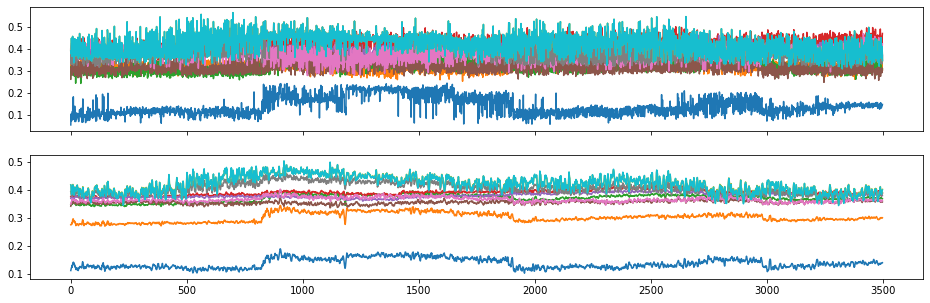

In [6]:
# Diagnostic Plot:
Duration = 700*5
IdSt = np.random.randint(tail.T-Duration)
fig, (ax) = plt.subplots(2,1,figsize=(16,5), sharex=True)
ax[0].plot(tail.angle[IdSt:IdSt+Duration,:])
ax[1].plot(tail.angle_smooth[IdSt:IdSt+Duration,:])
plt.show()

In [7]:
from AllSegmentationClass import Binarization

In [8]:
bin = Binarization(tail)

In [9]:
bin.compute_low_pass_speed(win_BC = 10,MinFiltSize=20000,MaxFiltSize=20)
bin.compute_noiselevel(win_zscore = 30,win_smoothing = 7, win_med=51)

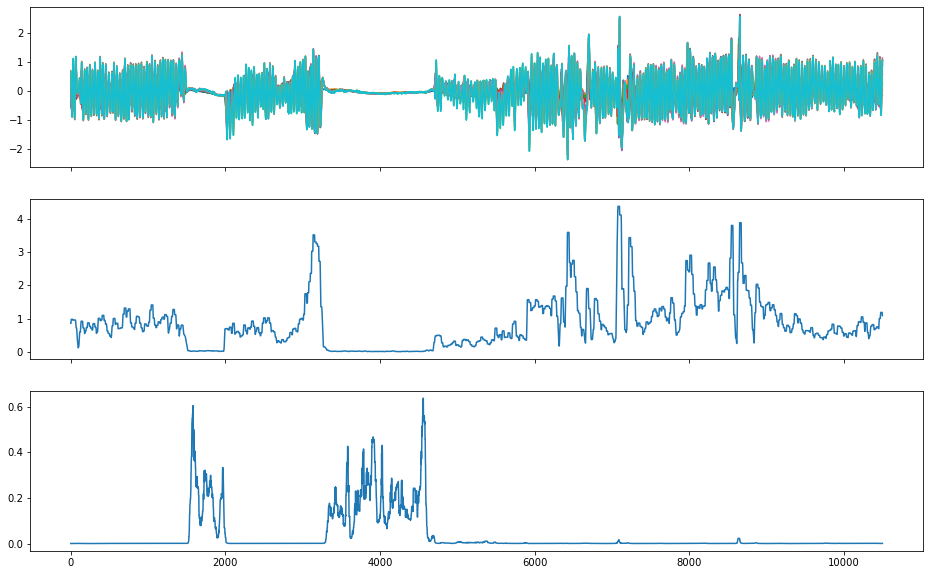

In [10]:
# Diagnostic Plot:
Duration = 700*15
IdSt = np.random.randint(tail.T-Duration)
fig, (ax) = plt.subplots(3,1,figsize=(16,10), sharex=True)
ax[0].plot(tail.angle_smooth[IdSt:IdSt+Duration,:])

ax[1].plot(bin.low_pass_speed[IdSt:IdSt+Duration])
ax[2].plot(bin.smooth_residual[IdSt:IdSt+Duration])

plt.show()

0.16813781455178933


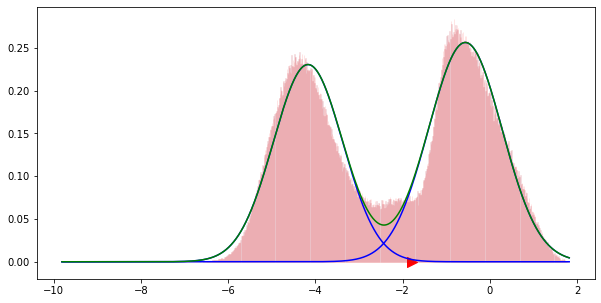

In [11]:
# Compute Threshold on speed:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
SpeedThresh,ax = bin.estimate_threshold_using_GMM(bin.low_pass_speed,margin_std = 3, axis=ax)
print(SpeedThresh)

0.08922095015485815


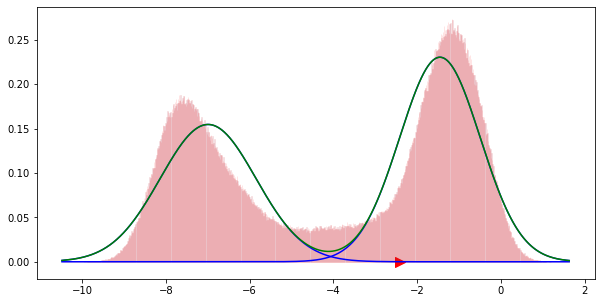

In [12]:
# Compute Threshold on noise:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
NoiseThresh,ax = bin.estimate_threshold_using_GMM(bin.smooth_residual,margin_std = 4, axis=ax)
print(NoiseThresh)

In [13]:
# Multiplicative Constrain: speed above SpeedThresh & noise below NoiseThresh 
tail_active = 1.0*(bin.low_pass_speed>SpeedThresh)#(bin.smooth_residual<NoiseThresh)
#np.logical_or(bin.smooth_residual>NoiseThresh,bin.low_pass_speed<SpeedThresh)
from AllSegmentationClass import find_onset_offset_numpy

onset,offset,duration = find_onset_offset_numpy(tail_active)

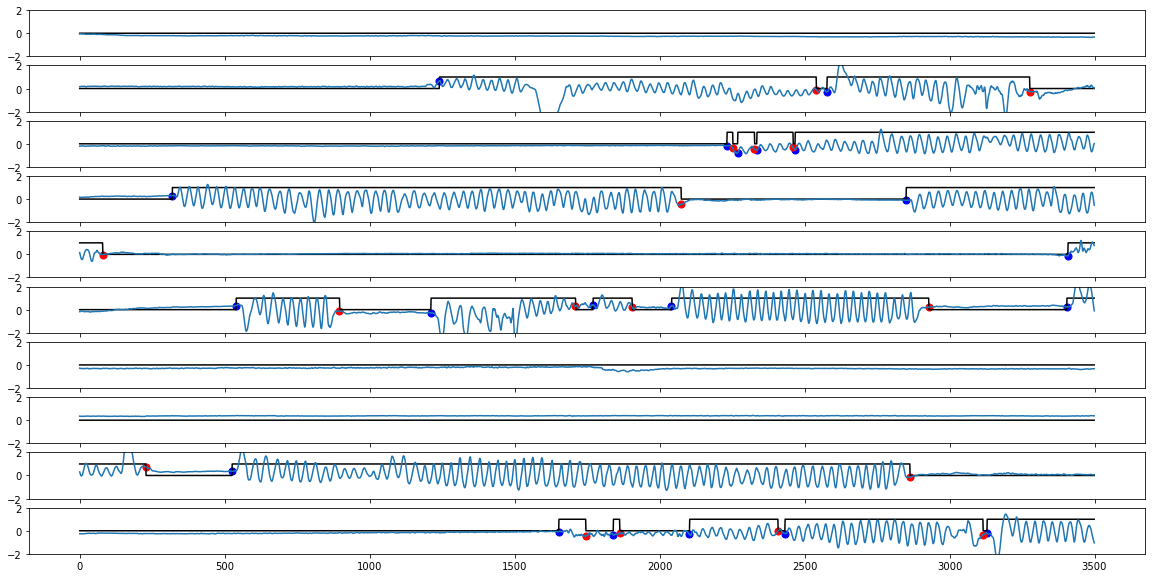

In [14]:
# Diagnostic Plot:
Duration = 700*5
s = tail.Reference_tail_segment_end
fig, (ax) = plt.subplots(10,1,figsize=(20,10), sharex=True)
for i in range(10):
    IdSt = np.random.randint(tail.T-Duration)
    ax[i].plot(tail_active[IdSt:IdSt+Duration],'k')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==1)[0]
    if len(id)>0:
        ax[i].scatter(id,tail.angle_smooth[IdSt:IdSt+Duration,s][id],s=50,c='b')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==-1)[0]
    if len(id)>0:
        ax[i].scatter(id,tail.angle_smooth[IdSt:IdSt+Duration,s][id],s=50,c='r')
    ax[i].plot(tail.angle_smooth[IdSt:IdSt+Duration,s])
    ax[i].set_ylim(-2,2)
plt.show()

In [15]:
# Could be useful to add some cleanup to tail active:

# morphological opening to erode then dilate



In [16]:
from AllSegmentationClass import HalfBeat

In [17]:
HB = HalfBeat(tail_active,tail)

In [18]:
HB.find_slice(Min_Duration = 80,Min_IBI = 10)
HB.extract_half_beat(Half_BCFilt = 150, stdThres = 5,MinSizeBlob=500,Margin=10)

In [19]:
peaks_pos,peaks_neg = HB.half_beat_pos,HB.half_beat_neg

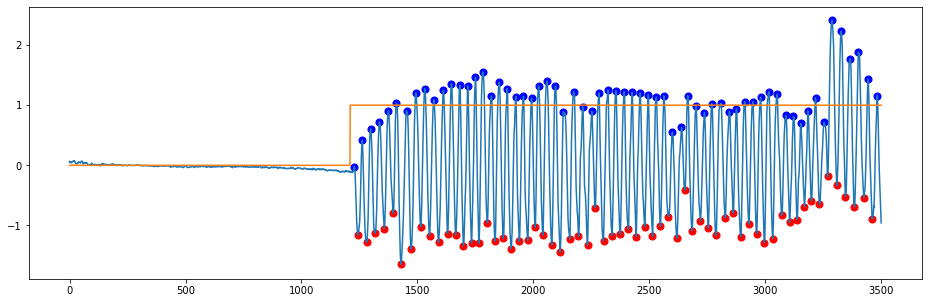

In [20]:
# Diagnostic Plot:
Duration = 700*5
IdSt = np.random.randint(tail.T-Duration)
s = tail.Reference_tail_segment_end

fig, (ax) = plt.subplots(1,1,figsize=(16,5), sharex=True)

id = peaks_pos[(peaks_pos>IdSt)&(peaks_pos<(IdSt+Duration))]-IdSt
ax.scatter(id,tail.angle_smooth[IdSt:IdSt+Duration,s][id],s=50,c='b')

id = peaks_neg[(peaks_neg>IdSt)&(peaks_neg<(IdSt+Duration))]-IdSt
ax.scatter(id,tail.angle_smooth[IdSt:IdSt+Duration,s][id],s=50,c='r')

ax.plot(tail.angle_smooth[IdSt:IdSt+Duration,s])
ax.plot(HB.tail_active_in[IdSt:IdSt+Duration])

plt.show()

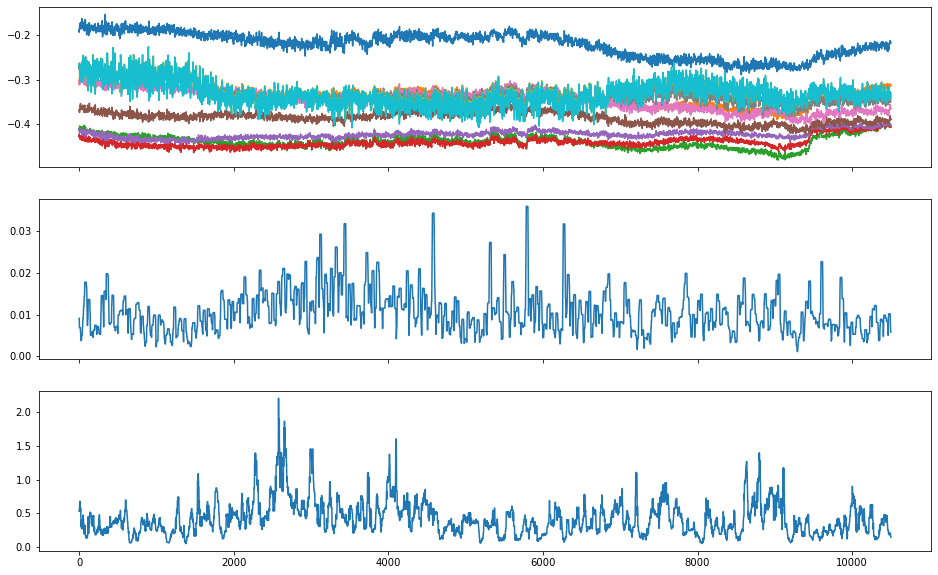

In [21]:

# Diagnostic Plot:
Duration = 700*15
IdSt = np.random.randint(tail.T-Duration)
fig, (ax) = plt.subplots(3,1,figsize=(16,10), sharex=True)
ax[0].plot(tail.angle_smooth[IdSt:IdSt+Duration,:])

ax[1].plot(bin.low_pass_speed[IdSt:IdSt+Duration])
ax[2].plot(bin.smooth_residual[IdSt:IdSt+Duration])

plt.show()

In [22]:

from SegmentationLocalLinearDynamicalSystem import LocallyLinearDynamicalSystem

llds = LocallyLinearDynamicalSystem([i for i in range(0,10,2)])
H,Y = llds.compute_hankel(tail.angle_smooth[:,tail.Reference_tail_segment_start:tail.Reference_tail_segment_end+1])

0
2
4
6
8


rank 13


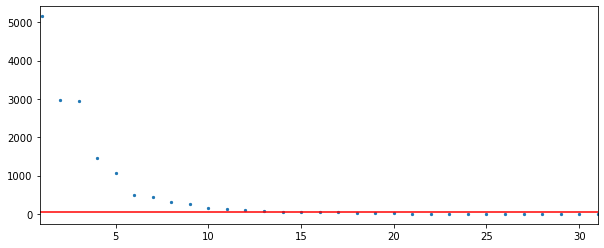

In [23]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = llds.compute_singular_value(ax)
plt.show()

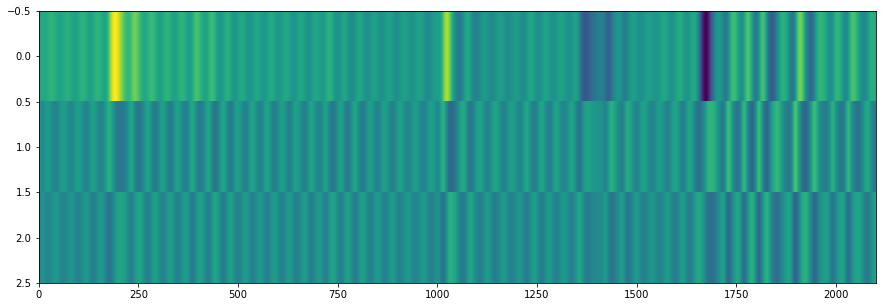

In [24]:
U,V,Sig = llds.compute_singular_vector(3)
plt.figure(figsize=(15,5))
plt.imshow(llds.V[:700*3,:].T,aspect='auto')
plt.show()

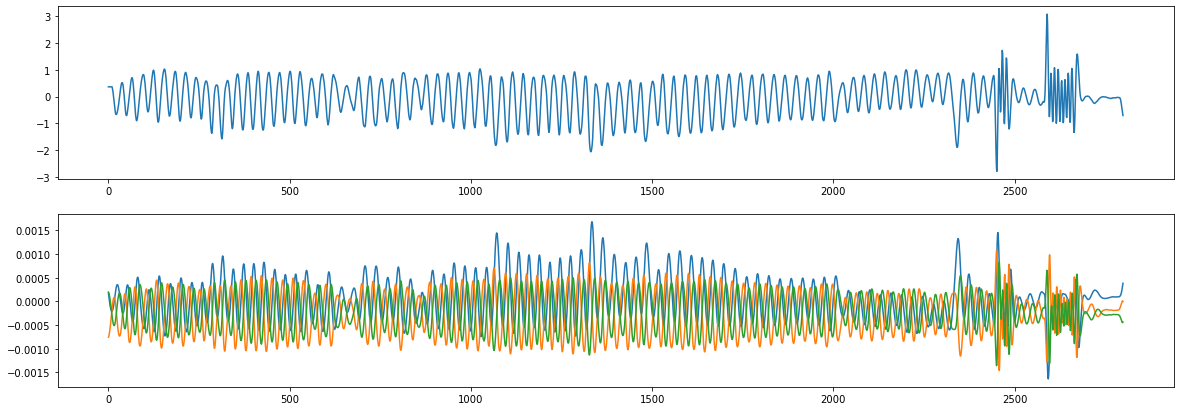

In [150]:
IdSt = 3163468#np.random.randint(llds.H.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(llds.X[IdSt:IdSt+Duration,4])
ax[1].plot(V[IdSt:IdSt+Duration,:])
plt.show()

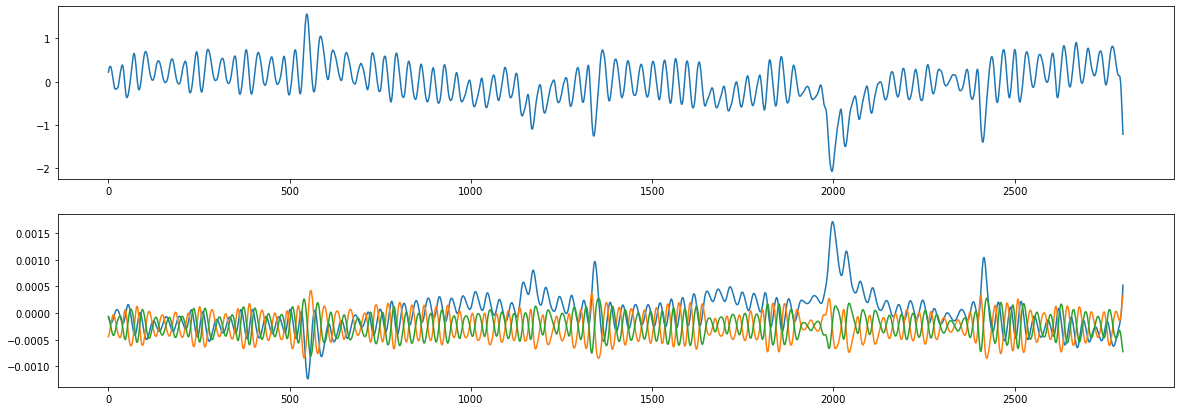

In [160]:
IdSt = np.random.randint(llds.H.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(llds.X[IdSt:IdSt+Duration,4])
ax[1].plot(V[IdSt:IdSt+Duration,:])
plt.show()

In [191]:
Duration/80

35.0

(<Figure size 720x432 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x27898da55e0>])

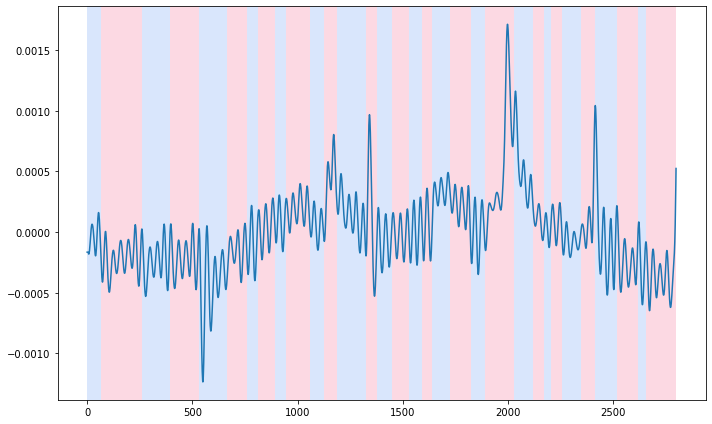

In [196]:

# Run Rupture on interval:
#signal = llds.X[IdSt:IdSt+Duration,4]
signal = llds.V[IdSt:IdSt+Duration,0]

algo = rpt.Window(width=60,jump=1, model="ar", params={"order": 3}).fit(signal)
#algo = rpt.Dynp(model="ar", params={"order": 5}).fit(signal)
#algo = rpt.Pelt(model="ar", params={"order": 5}, min_size=60, jump=1).fit(signal)

bkps = algo.predict(n_bkps=35)
#bkps = algo.predict(pen=2)
rpt.show.display(signal, bkps, figsize=(10, 6))

In [188]:
n_bkps_max = 60

array_of_n_bkps = np.arange(1, n_bkps_max + 1)

def get_sum_of_cost(algo, n_bkps) -> float:
    """Return the sum of costs for the change points `bkps`"""
    bkps = algo.predict(n_bkps=n_bkps)
    return algo.cost.sum_of_costs(bkps)


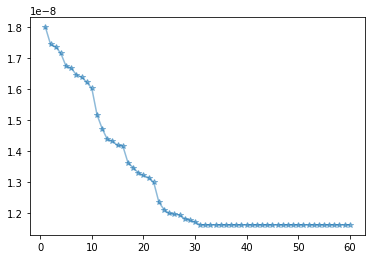

In [189]:
c = [get_sum_of_cost(algo=algo, n_bkps=n_bkps) for n_bkps in array_of_n_bkps]

plt.plot(array_of_n_bkps,c,"-*",alpha=0.5)

# Singular Spectrum Analysis

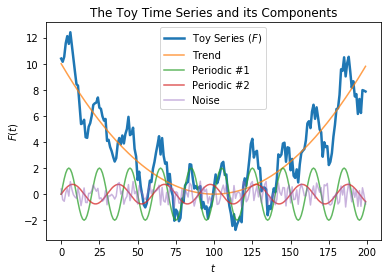

In [198]:
N = 200 # The number of time 'moments' in our toy series
t = np.arange(0,N)
trend = 0.001 * (t - 100)**2
p1, p2 = 20, 30
periodic1 = 2 * np.sin(2*np.pi*t/p1)
periodic2 = 0.75 * np.sin(2*np.pi*t/p2)

np.random.seed(123) # So we generate the same noisy time series every time.
noise = 2 * (np.random.rand(N) - 0.5)
F = trend + periodic1 + periodic2 + noise

# Plot everything
plt.plot(t, F, lw=2.5)
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.title("The Toy Time Series and its Components");

In [199]:
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        # The Hankelisation below only works for matrices where L < K.
        # To Hankelise a L > K matrix, first swap L and K and tranpose X.
        # Set flag for HX to be transposed before returning. 
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L,K))
    
    # I know this isn't very efficient...
    for m in range(L):
        for n in range(K):
            s = m+n
            if 0 <= s <= L-1:
                for l in range(0,s+1):
                    HX[m,n] += 1/(s+1)*X[l, s-l]    
            elif L <= s <= K-1:
                for l in range(0,L-1):
                    HX[m,n] += 1/(L-1)*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s-K+1,L):
                    HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

In [200]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

In [202]:
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)

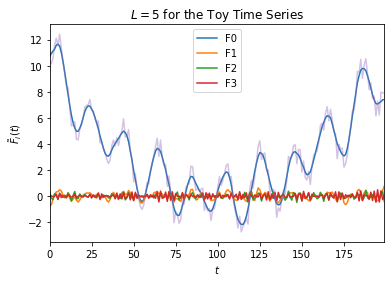

In [225]:
F_ssa_L5 = SSA(F, 4)
F_ssa_L5.components_to_df().plot()
F_ssa_L5.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=5$ for the Toy Time Series")
plt.show()

Text(0.5, 1.0, 'W-Correlation for Toy Time Series, $L=20$')

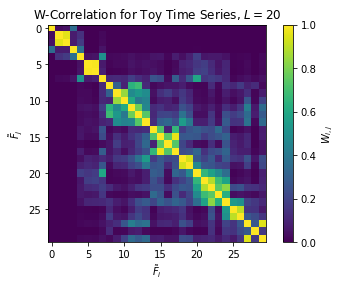

In [242]:
F_ssa_L20 = SSA(F, 30)
F_ssa_L20.plot_wcorr()
plt.title("W-Correlation for Toy Time Series, $L=20$")

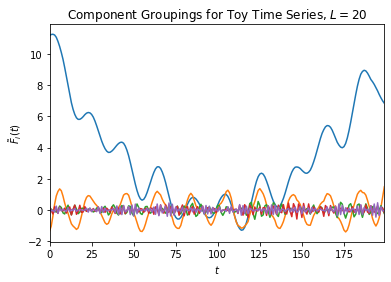

In [236]:
F_ssa_L20.reconstruct(0).plot()
F_ssa_L20.reconstruct([1,2]).plot()
F_ssa_L20.reconstruct([3,4]).plot()
F_ssa_L20.reconstruct([5,6]).plot()
F_ssa_L20.reconstruct([7,8]).plot()

plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Toy Time Series, $L=20$");


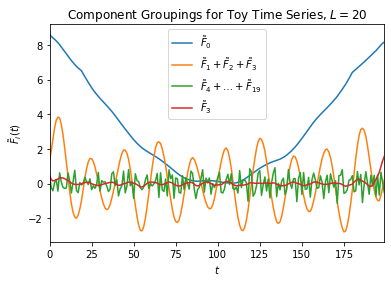

In [219]:
F_ssa_L20.reconstruct(0).plot()
F_ssa_L20.reconstruct([1,2,3]).plot()
F_ssa_L20.reconstruct(slice(4,20)).plot()
F_ssa_L20.reconstruct(3).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Toy Time Series, $L=20$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2+\tilde{F}_3$", 
            r"$\tilde{F}_4+ \ldots + \tilde{F}_{19}$",
            r"$\tilde{F}_3$"]);

In [26]:
all_peaks = np.concatenate((HB.half_beat_pos,HB.half_beat_neg))
all_peaks = np.sort(all_peaks)
#all_peaks = all_peaks-tau
all_peaks = all_peaks[all_peaks<llds.X.shape[0]]

<ipython-input-29-3ae8427e3f6e>:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  signal = np.sum((np.sin(2 * np.pi * tt * f) for f in freqs.T))


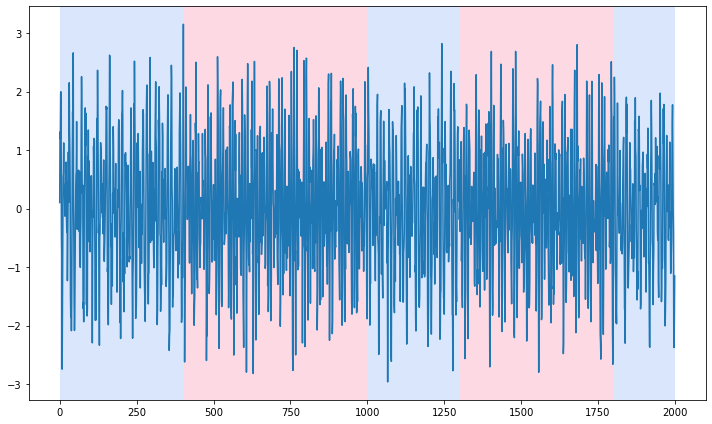

In [29]:
from itertools import cycle
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

# creation of data
n = 2000
n_bkps, sigma = 4, 0.5  # number of change points, noise standart deviation
bkps = [400, 1000, 1300, 1800, n]
f1 = np.array([0.075, 0.1])
f2 = np.array([0.1, 0.125])
freqs = np.zeros((n, 2))
for sub, val in zip(np.split(freqs, bkps[:-1]), cycle([f1, f2])):
    sub += val
tt = np.arange(n)
signal = np.sum((np.sin(2 * np.pi * tt * f) for f in freqs.T))
signal += np.random.normal(scale=sigma, size=signal.shape)
# display signal
rpt.show.display(signal, bkps, figsize=(10, 6))
plt.show()

In [40]:
c = rpt.costs.CostAR(order=10).fit(signal)
print(c.error(50, 150))

40.43608786974629


In [41]:
print(c.sum_of_costs(bkps))

782.40326329638


In [72]:
c = rpt.costs.CostAR(order=10)
algo = rpt.Dynp(custom_cost=c)
# is equivalent to

#algo = rpt.Window(width=300,jump=10, model="ar", params={"order": 10}).fit(signal)

algo = rpt.Dynp(model="ar", params={"order": 10}).fit(signal)

In [73]:
result = algo.predict(n_bkps=4)


In [74]:
result

[400, 985, 1315, 1805, 2000]

In [75]:
# Choose the number of changes (elbow heuristic)
n_bkps_max = 20  # K_max
# Start by computing the segmentation with most changes.
# After start, all segmentations with 1, 2,..., K_max-1 changes are also available for free.
_ = algo.predict(n_bkps_max)


array_of_n_bkps = np.arange(1, n_bkps_max + 1)


def get_sum_of_cost(algo, n_bkps) -> float:
    """Return the sum of costs for the change points `bkps`"""
    bkps = algo.predict(n_bkps=n_bkps)
    return algo.cost.sum_of_costs(bkps)



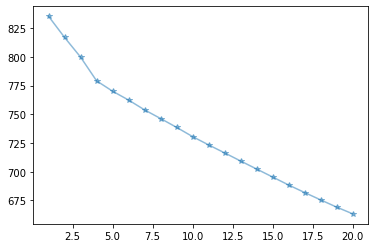

In [78]:
c = [get_sum_of_cost(algo=algo, n_bkps=n_bkps) for n_bkps in array_of_n_bkps]

plt.plot(array_of_n_bkps,c,"-*",alpha=0.5)